# Formative 2

In [1]:
import re
import operator
import warnings
import copy
import numpy as np
import pandas as pd

from random import shuffle
from collections import defaultdict, Counter
#from sklearn.feature_extraction import stop_words
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# Load POS tags
tags = dict()
with open('pos_tags.txt', 'r') as f:
    for l in f:
        tags[l.strip().split('\t')[0]] = l.strip().split('\t')[1]

### Part 0: Setting up Training and Test Sets

In [4]:
# Initialize data structures
train_posts2 = defaultdict(list)
test_posts2 = defaultdict(list)

In [ ]:
len(train_posts['male'])

In [6]:
train_posts2

defaultdict(list, {})

In [7]:
# Define random seed
random_seed = 123

# Define gender categories
categories = ['male', 'female']

# Initialize data structures
train_posts = defaultdict(list)
test_posts = defaultdict(list)

# Load data and split into train and test posts
for c_i in categories:
    posts = list()
    with open('{}_posts.txt'.format(c_i), 'r') as f:
        for l in f:
            posts.append(l.strip().split())
        train_posts[c_i], test_posts[c_i] =  train_test_split(posts, train_size=50000, shuffle=True, random_state=123)

### Part I: Describing the Dataset

In [23]:
# Define function to get tag of word
def w2tag(w):
    return tags[re.sub(r'\S+/', '', w)]

In [11]:
# Initialize data structures
vocab = defaultdict(Counter)
n_posts = defaultdict(Counter)

# Create vocabularies
for c_i in categories:
    for p in train_posts[c_i]:
        vocab[c_i].update(p)
        n_posts[c_i].update(set(p))

In [13]:
vocab

defaultdict(collections.Counter,
            {'male': Counter({'Millions/NNS': 20,
                      'are/VBP': 52570,
                      'Facing/VBG': 16,
                      'Squeeze/NN': 3,
                      'on/IN': 81170,
                      'House/NNP': 1250,
                      'Payments/NNS': 19,
                      './.': 641057,
                      '"/FW': 10239,
                      'millions/NNS': 495,
                      'of/IN': 243364,
                      'Americans/NNPS': 1005,
                      'who/WP': 24183,
                      'stretched/VBD': 29,
                      'themselves/PRP': 1718,
                      'financially/RB': 77,
                      'to/TO': 307650,
                      'buy/VB': 2049,
                      'homes/NNS': 444,
                      'face/VBP': 205,
                      'a/DT': 248512,
                      'painful/JJ': 298,
                      'adjustment/NN': 59,
                      '--

**A) How do the rank-frequency distributions of the function word inventories for the female and male training sets compare?**

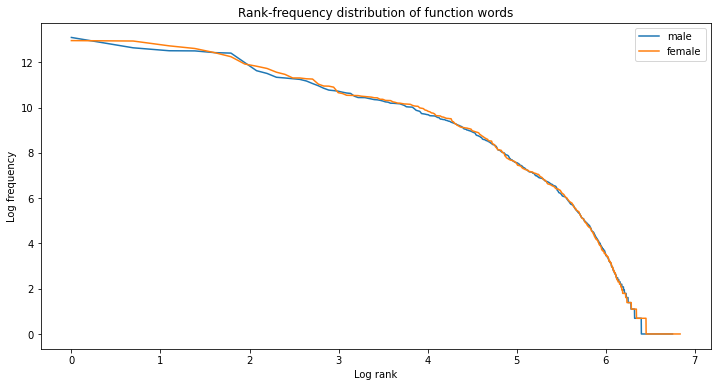

In [19]:
# Create plots of rank-frequency distributions for function words
fig, ax = plt.subplots(1, figsize=(12, 6))

for c_i in categories:

    y = np.log([c for w, c in vocab[c_i].most_common() if w2tag(w) == 'F'])
    x = np.log(list(range(1, len(y) + 1)))
    ax.plot(x, y, label=c_i)

ax.set_title('Rank-frequency distribution of function words')
ax.set_xlabel('Log rank')
ax.set_ylabel('Log frequency')
ax.legend()

plt.show()

They are largely similar, but the high-frequency words seem to have higher counts in the female than the male data. 

**B) How do the rank-frequency distributions of the content word inventories for the female and male training sets compare?**

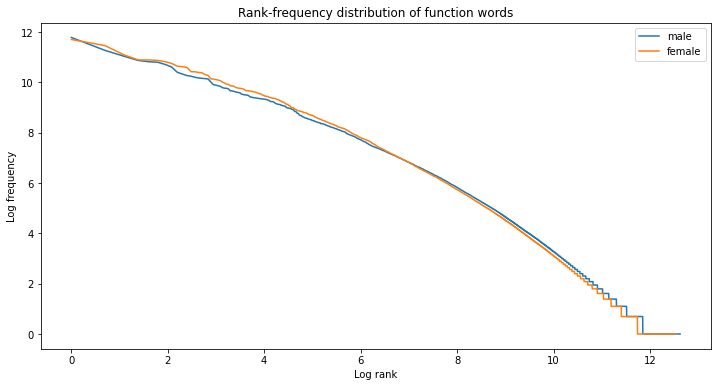

In [22]:
# Create plots of rank-frequency distributions for content words
fig, ax = plt.subplots(1, figsize=(12, 6))

for c_i in categories:

    y = np.log([c for w, c in vocab[c_i].most_common() if w2tag(w) == 'C'])
    x = np.log(list(range(1, len(y) + 1)))
    ax.plot(x, y, label=c_i)

ax.set_title('Rank-frequency distribution of function words')
ax.set_xlabel('Log rank')
ax.set_ylabel('Log frequency')
ax.legend()

plt.show()

They are again largely similar, but the mid-frequency words seem to have higher counts in the female than the male data.

**C) What is the Jaccard similarity between the function word inventories of the female and male training sets?**

In [23]:
# Define function for calculating Jaccard similarity
def jaccard_sim(vocab_1, vocab_2):
    return len(vocab_1.intersection(vocab_2)) / len(vocab_1.union(vocab_2))

In [24]:
# Calculate Jaccard similarity for function words
sim = jaccard_sim(set(w for w in vocab['male'] if w2tag(w) == 'F'), set(w for w in vocab['female'] if w2tag(w) == 'F'))
print('Jaccard similarity for function words: {:.4f}'.format(sim))

Jaccard similarity for function words: 0.5649


The Jaccard similarity between the function word inventories is 0.56.

**D) What is the Jaccard similarity between the content word inventories
of the female and male training sets?**

In [25]:
# Calculate Jaccard similarity for content words
sim = jaccard_sim(set(w for w in vocab['male'] if w2tag(w) == 'C'), set(w for w in vocab['female'] if w2tag(w) == 'C'))
print('Jaccard similarity for content words: {:.4f}'.format(sim))

Jaccard similarity for content words: 0.2879


The Jaccard similarity between the content word inventories is 0.29.

**E) What are the 30 most frequent male function words? The 30 most
frequent female function words?**

In [12]:
# Print 30 most frequent function words
for c_i in categories:
    print('30 most frequent {} function words:'.format(c_i), [w for w, c in vocab[c_i].most_common() if w2tag(w) == 'F'][:30])

30 most frequent male function words: ['the/DT', 'to/TO', 'I/PRP', 'and/CC', 'a/DT', 'of/IN', 'in/IN', 'it/PRP', 'for/IN', 'you/PRP', 'on/IN', 'that/IN', 'my/PRP$', 'with/IN', 'this/DT', 'The/DT', 'at/IN', 'me/PRP', 'but/CC', 'as/IN', 'we/PRP', 'from/IN', "'s/POS", 'or/CC', 'will/MD', 'they/PRP', 'by/IN', 'he/PRP', 'about/IN', 'all/DT']
30 most frequent female function words: ['the/DT', 'I/PRP', 'to/TO', 'and/CC', 'a/DT', 'of/IN', 'in/IN', 'it/PRP', 'my/PRP$', 'for/IN', 'you/PRP', 'on/IN', 'that/IN', 'with/IN', 'me/PRP', 'this/DT', 'but/CC', 'at/IN', 'we/PRP', 'The/DT', 'he/PRP', 'from/IN', "'s/POS", 'as/IN', 'all/DT', 'about/IN', 'or/CC', 'It/PRP', 'they/PRP', 'like/IN']


It is interesting to note that several first-person singular pronouns ('I/PRP', 'my/PRP\\$', 'me/PRP') are ranked higher in the female than in the male data.

**F) What are the 30 most frequent male content words? The 30 most
frequent female content words?**

In [13]:
# Print 30 most frequent content words
for c_i in categories:
    print('30 most frequent {} content words:'.format(c_i), [w for w, c in vocab[c_i].most_common() if w2tag(w) == 'C'][:30])

30 most frequent male content words: ['is/VBZ', 'was/VBD', 'be/VB', 'are/VBP', 'not/RB', '"/NN', 'have/VBP', "'s/VBZ", ')/NN', 'one/CD', 'just/RB', 'has/VBZ', 'time/NN', 'had/VBD', 'i/FW', 'so/RB', '(/NN', 'been/VBN', 'people/NNS', 'were/VBD', 'm/FW', 'get/VB', 'have/VB', 'am/VBP', 'good/JJ', 'now/RB', '"/CD', 'other/JJ', 'really/RB', 'then/RB']
30 most frequent female content words: ['is/VBZ', 'was/VBD', 'be/VB', 'have/VBP', "'s/VBZ", 'not/RB', 'are/VBP', 'i/FW', 'so/RB', 'just/RB', '"/NN', 'had/VBD', 'm/FW', 'time/NN', 'one/CD', ')/NN', 'am/VBP', 'been/VBN', '(/NN', 'get/VB', 'really/RB', 'has/VBZ', 'were/VBD', 'now/RB', 'day/NN', 'have/VB', 'people/NNS', 'going/VBG', 'good/JJ', 'then/RB']


It is important to note that most of these words are actually function words that were misclassified by the POS tagger.

**G) According to the mutual information measure, which function words are the 30 most informative for being male? And for being female?**

In [12]:
# Define function for calculating mutual information
def mi(w, n_posts):
    n = np.array([[n_posts['male'][w], 50000 - n_posts['male'][w]], [n_posts['female'][w], 50000 - n_posts['female'][w]]])
    n = n / n.sum()
    return np.sum([n[i, j] * np.log2(n[i, j] / (n[i, :].sum() * n[:, j].sum())) for j in range(2) for i in range(2)])

In [36]:
n = np.array([[n_posts['male'][w], 50000 - n_posts['male'][w]], [n_posts['female'][w], 50000 - n_posts['female'][w]]])


In [39]:
n

array([[    0, 50000],
       [    1, 49999]])

In [ ]:
n

In [34]:
w = [x for x in set(vocab['female'])][10040]

In [35]:
w

'CHERRY/SYM'

In [52]:
n = np.array([[n_posts['male'][w], 50000 - n_posts['male'][w]], [n_posts['female'][w], 50000 - n_posts['female'][w]]])

In [64]:
i=0
j=0

In [65]:
n[i, j] * np.log2(n[i, j] / (n[i, :].sum() * n[:, j].sum()))

-13274.515701408915

In [73]:
n[i,:]

array([  798, 49202])

In [74]:
n[:,j]

array([798, 826])

In [ ]:
# 798 * np.log2()

In [68]:
n[i,j] / 

798

In [53]:
n

array([[  798, 49202],
       [  826, 49174]])

In [58]:
list(((i,j) for j in range(2) for i in range(2)))

[(0, 0), (1, 0), (0, 1), (1, 1)]

In [17]:
vocabs = set(vocab['female']).intersection(set(vocab['male']))

In [ ]:
mi

In [24]:
# Calculate mutual information for function words
mi_f = sorted([(mi(w, n_posts), w) for w in set(vocab['female']).intersection(set(vocab['male'])) if  w2tag(w) == 'F'], reverse=True)

In [16]:
# Print 30 overall most informative function words
print('30 overall most informative function words:', [w for mi, w in mi_f][:30])

30 overall most informative function words: ['my/PRP$', 'me/PRP', 'she/PRP', 'her/PRP$', 'I/PRP', 'She/PRP', 'The/DT', 'so/IN', 'myself/PRP', 'My/PRP$', 'her/PRP', 'because/IN', 'against/IN', 'when/WRB', 'like/IN', 'oh/UH', 'by/IN', 'but/CC', 'In/IN', 'we/PRP', 'it/PRP', 'Oh/UH', 'its/PRP$', 'up/RP', 'And/CC', 'him/PRP', 'all/DT', 'that/DT', 'as/IN', 'their/PRP$']


In [17]:
# Print 30 most informative function words for individual genders
print('30 most informative function words for being male:', [w for mi, w in mi_f if n_posts['male'][w] > n_posts['female'][w]][:30])
print('30 most informative function words for being female:', [w for mi, w in mi_f if n_posts['female'][w] > n_posts['male'][w]][:30])

30 most informative function words for being male: ['The/DT', 'against/IN', 'by/IN', 'In/IN', 'its/PRP$', 'as/IN', 'their/PRP$', 'an/DT', 'which/WDT', 'A/DT', 'This/DT', "'/POS", 'If/IN', 'among/IN', 'itself/PRP', 'With/IN', 'For/IN', 'As/IN', 'From/IN', 'An/DT', 'per/IN', 'of/IN', 'upon/IN', 'themselves/PRP', 'from/IN', 'To/TO', 'his/PRP$', 'via/IN', 'between/IN', 'within/IN']
30 most informative function words for being female: ['my/PRP$', 'me/PRP', 'she/PRP', 'her/PRP$', 'I/PRP', 'She/PRP', 'so/IN', 'myself/PRP', 'My/PRP$', 'her/PRP', 'because/IN', 'when/WRB', 'like/IN', 'oh/UH', 'but/CC', 'we/PRP', 'it/PRP', 'Oh/UH', 'up/RP', 'And/CC', 'him/PRP', 'all/DT', 'that/DT', 'until/IN', 'out/RP', 'how/WRB', 'We/PRP', 'So/IN', 'all/PDT', 'Okay/UH']


**H) According to the mutual information measure, which content words  are the 30 most informative for being male? And for being female?**

In [18]:
# Calculate mutual information for content words
mi_c = sorted([(mi(w, n_posts), w) for w in set(vocab['female']).intersection(set(vocab['male'])) if  w2tag(w) == 'C'], reverse=True)

In [19]:
# Print 30 most informative content words for individual genders
print('30 most informative content words for being male:', [w for mi, w in mi_c if n_posts['male'][w] > n_posts['female'][w]][:30])
print('30 most informative content words for being female:', [w for mi, w in mi_c if n_posts['female'][w] > n_posts['male'][w]][:30])

30 most informative content words for being male:	 ['government/NN', '2006/CD', '(/NNP', 'war/NN', 'Bush/NNP', 'based/VBN', 'Israel/NNP', 'political/JJ', 'article/NN', 'President/NNP', 'team/NN', 'players/NNS', 'United/NNP', 'World/NNP', 'election/NN', 'War/NNP', 'Iraq/NNP', 'media/NNS', 'News/NNP', 'US/NNP', 'Microsoft/NNP', 'com/NN', 'site/NN', 'America/NNP', 'American/JJ', 'nation/NN', 'system/NN', 'U.S./NNP', 'The/NNP', ')/NNP']
30 most informative content words for being female:	 ['so/RB', 'm/FW', 'am/VBP', 'love/VBP', 'really/RB', 'mom/NN', 'just/RB', 'husband/NN', 'cute/JJ', 'baby/NN', 'go/VB', 'little/JJ', 'know/VBP', "'s/VBZ", 'fun/NN', 'feel/VB', 'house/NN', 'girl/NN', 'happy/JJ', 'day/NN', "don't/VBP", "can't/VBP", 'night/NN', 'going/VBG', 'home/NN', 'went/VBD', 'too/RB', 'bed/NN', 'love/NN', "didn't/VBP"]


**I) Based on these descriptions of the data, what expectations do you
have about the nature and reliability of textual evidence for the gender
of the author?**

The vocabulary differences between the male and female data should provide textual evidence for at least some success in gender classification. Content words are expected to be better features than function words. At the same time, the size of the vocabulary overlap suggests that the performance will be in the mid rather than in the high range.

### Part II: Naive Bayes Classifier, Bag of Function Words, No Smoothing

In [20]:
# Define function to train Naive Bayes
def nb_f(vocab, categories):
    # Calculate unsmoothed probabilities
    probs = dict()
    for c_i in categories:
        probs[c_i] = {w: vocab[c_i][w] for w in vocab[c_i] if w2tag(w) == 'F' and vocab['male'][w] > 0 and vocab['female'][w] > 0}
        total = sum(probs[c_i].values())
        probs[c_i] = {w: probs[c_i][w] / total for w in probs[c_i]}
    return probs

In [34]:
# Train Naive Bayes
probs = nb_f(vocab, categories)

In [35]:
# Initialize lists for storing ground truth labels and predictions
labels = list()
preds = list()

# Loop over gender categories
for c_i in categories:
    
    # Loop over test posts
    for p in test_posts[c_i]:
        
        # Store ground truth
        labels.append(c_i)
        
        # Calculate scores for gender categories
        scores = {'male': 0, 'female': 0}
        for w in p:
            if w in probs[c_i]:
                scores['male'] += np.log(probs['male'][w])
                scores['female'] += np.log(probs['female'][w])
        
        # Use higher score for prediction
        preds.append(max(scores.items(), key=operator.itemgetter(1))[0])
            
print('Accuracy: {:.3f}'.format(len([(l, p)for l, p in zip(labels, preds) if l == p]) / len(labels)))

Accuracy: 0.644


**A) What is the overall accuracy of this classifier?**

The overall accuracy of the classifier is 64.4%, which is almost 15% above the random baseline.

**B) Are the errors in in the confusion matrix symmetric? That is, were male blogposts just
as likely to be mistaken for female blogposts as the other way around?**

In [23]:
# Initialize confuction matrix as dictionary
c_matrix = defaultdict(Counter)

# Count all training posts
n = len(test_posts['male'] + test_posts['female'])

# Create confusion matrix
for g, p in zip(labels, preds):
    c_matrix[g][p] += 1 / n
    
# Display confusion matrix
pd.DataFrame.from_dict(c_matrix, orient='index', columns=categories).reindex(index=categories)

,male,female
male,0.330913,0.169077
female,0.187276,0.312734


The error rates are largely similar, although the performance is slightly better for the male data.

### Part III: Naive Bayes, Bag of Content Words, Absolute Discounting

In [24]:
# Define function to train Naive Bayes
def nb_c(vocab, categories, delta):

    # Calculate number of unseen words for both categories
    vocab_sizes = defaultdict(dict)
    for c_i in categories:
        vocab_sizes[c_i]['seen'] = len(vocab[c_i])
        for c_j in categories:
            if c_i == c_j:
                continue
            vocab_sizes[c_i]['unseen'] = len([w for w in vocab[c_j] if vocab[c_i][w] == 0])

    # Calculate smoothed probabilities
    probs = dict()
    counts = dict()
    for c_i in categories:
        probs[c_i] = {w: vocab[c_i][w] - delta for w in vocab[c_i]}
        for c_j in categories:
            if c_i == c_j:
                continue
            for w in vocab[c_j]:
                if vocab[c_i][w] == 0:
                    probs[c_i][w] = delta * (vocab_sizes[c_i]['seen'] / vocab_sizes[c_i]['unseen'])
    
        # Store adjusted counts
        counts[c_i] = probs[c_i]

        total = sum(probs[c_i].values())
        probs[c_i] = {w: probs[c_i][w] / total for w in probs[c_i]}
    return probs, counts

In [25]:
# Define words that have to be removed
drop = dict()
for c_i in categories:
    drop[c_i] = set([w for w, c in vocab[c_i].most_common() if w2tag(w) == 'C'][:16])

In [26]:
# Initialize deltas
deltas = np.arange(0.9, 0.05, -0.05)

# Initialize data structures
accs = list()
c_0_smoothed = defaultdict(list)
c_1_smoothed = defaultdict(list)

In [27]:
# Perform cross-validation
for d in deltas:
    
    # Shuffle training data
    for c_i in categories:
        shuffle(train_posts[c_i])
    
    # Define total number of train posts and step size
    n = len(train_posts['male'])
    s = int(len(train_posts['male']) / 5)
    
    # Initialize list for storing accuracy values
    dev_accs = list()
    
    # Initialize dictionaries for storing adjusted counts
    c_0 = defaultdict(list)
    c_1 = defaultdict(list)
    
    for i in range(0, n, s):
            
        # Initialize training vocabularies
        vocab_train = defaultdict(Counter)
        
        for c_i in categories:
            
            # Loop over cross-validation train posts
            for p in train_posts[c_i][:i] + train_posts[c_i][i+s:]:
                
                # Only add content words not in set for removal
                vocab_train[c_i].update([w for w in p if w not in drop[c_i] and w2tag(w) == 'C'])
        
        # Train Naive Bayes
        probs, counts = nb_c(vocab_train, categories, d)
        
        # Store adjusted counts
        for c_i in categories:
            c_0[c_i].append([c for w, c in counts[c_i].items() if vocab_train[c_i][w] == 0][0])
            c_1[c_i].append([c for w, c in counts[c_i].items() if vocab_train[c_i][w] == 1][0])
        
        # Initialize lists for storing ground truth labels and predictions
        labels = list()
        preds = list()

        # Loop over gender categories
        for c_i in categories:
            
            # Loop over cross-validation dev posts
            for p in train_posts[c_i][i:i+s]:
                
                # Store ground truth
                labels.append(c_i)
                
                # Calculate scores for gender categories
                scores = {'male': 0, 'female': 0}
                for w in p:
                    if w in probs[c_i]:
                        scores['male'] += np.log(probs['male'][w])
                        scores['female'] += np.log(probs['female'][w])
                        
                # Use higher score for prediction
                preds.append(max(scores.items(), key=operator.itemgetter(1))[0])
        
        dev_accs.append(len([(l, p)for l, p in zip(labels, preds) if l == p]) / len(labels))
    
    # Store mean adjusted counts for delta
    for c_i in categories:
        c_0_smoothed[c_i].append(np.mean(c_0[c_i]))
        c_1_smoothed[c_i].append(np.mean(c_1[c_i]))

    accs.append(np.mean(dev_accs))        
    print('Mean accuracy for delta of {:.2f}: {:.3f}'.format(d, np.mean(dev_accs)))

Mean accuracy for delta of 0.9:	0.6648
Mean accuracy for delta of 0.85:	0.6670
Mean accuracy for delta of 0.7999999999999999:	0.6696
Mean accuracy for delta of 0.7499999999999999:	0.6692
Mean accuracy for delta of 0.6999999999999998:	0.6703
Mean accuracy for delta of 0.6499999999999998:	0.6721
Mean accuracy for delta of 0.5999999999999998:	0.6716
Mean accuracy for delta of 0.5499999999999997:	0.6718
Mean accuracy for delta of 0.49999999999999967:	0.6720
Mean accuracy for delta of 0.4499999999999996:	0.6728
Mean accuracy for delta of 0.3999999999999996:	0.6725
Mean accuracy for delta of 0.34999999999999953:	0.6733
Mean accuracy for delta of 0.2999999999999995:	0.6744
Mean accuracy for delta of 0.24999999999999944:	0.6743
Mean accuracy for delta of 0.1999999999999994:	0.6744
Mean accuracy for delta of 0.14999999999999936:	0.6746
Mean accuracy for delta of 0.09999999999999931:	0.6742


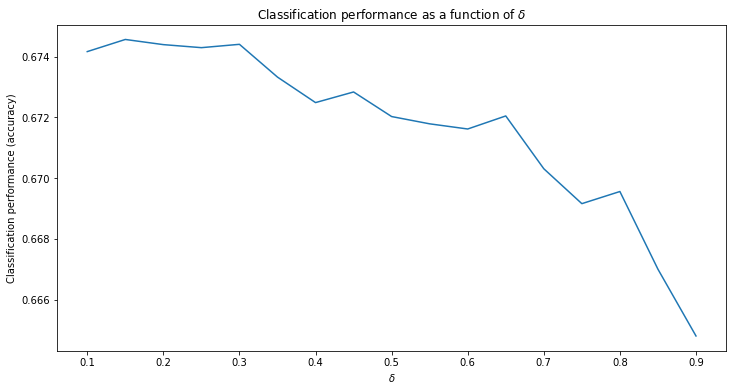

In [29]:
# Create plot of classification performance as a function of delta
fig, ax = plt.subplots(1, figsize=(12, 6))

ax.plot(deltas, accs)
ax.set_title('Classification performance as a function of $\delta$')
ax.set_xlabel('$\delta$')
ax.set_ylabel('Classification performance (accuracy)')

plt.show()

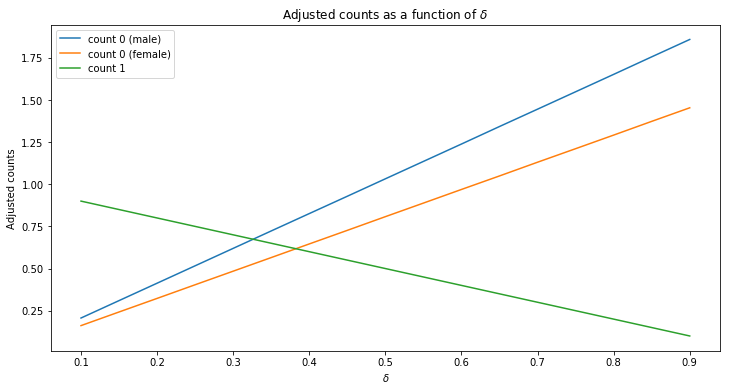

In [30]:
# Create plots of rank-frequency distributions for content words
fig, ax = plt.subplots(1, figsize=(12, 6))

for c_i in categories:

    ax.plot(deltas, c_0_smoothed[c_i], label='count 0 ({})'.format(c_i))

ax.plot(deltas, c_1_smoothed[c_i], label='count 1')
ax.set_title('Adjusted counts as a function of $\delta$')
ax.set_xlabel('$\delta$')
ax.set_ylabel('Adjusted counts')
ax.legend()

plt.show()

In [36]:
# Train on all train posts with delta of 0.256
d = 0.15

# Prepare training vocabularies
vocab_train = defaultdict(Counter)
for c_i in categories:
    vocab_train[c_i] = Counter({w: vocab[c_i][w] for w in vocab[c_i] if w not in drop[c_i] and w2tag(w) == 'C'})
    
# Train Naive Bayes
probs, _ = nb_c(vocab_train, categories, d)

# Initialize lists for storing ground truth labels and predictions
labels = list()
preds = list()

# Loop over gender categories
for c_i in categories:
    
    # Loop over test posts
    for p in test_posts[c_i]:
        
        # Store ground truth
        labels.append(c_i)
        
        # Calculate scores for gender categories
        scores = {'male': 0, 'female': 0}
        for w in p:
            if w in probs[c_i]:
                scores['male'] += np.log(probs['male'][w])
                scores['female'] += np.log(probs['female'][w])
        
        # Use higher score for prediction
        preds.append(max(scores.items(), key=operator.itemgetter(1))[0])
            
print('Accuracy: {:.3f}'.format(len([(l, p)for l, p in zip(labels, preds) if l == p]) / len(labels)))

Accuracy: 0.678


**A) What is the overall error rate for this classifier? Compare it to the error rate from the function word classifier. What do you think about this comparison?**

The overall error rate for this classifier is 32.2% compared 35.6% for the classifier based on function words, corresponding to a 3.4% increase in performance. The classifier based on content words thus worked substantially better than the one based on function words. One reason for this is that the differences between the male and female vocabularies are larger for content than for function words (see Jaccard similarity scores above).

**B) Why do you think we told you to disregard the most frequent 16 content words for each
gender?**

The most frequent content words are function words that were misclassified by the POS tagger.

**C) Are the adjusted counts for  $w_i \in V^{(female)}_{seen}$ and $w_i \in V^{(male)}_{seen}$ identical? Why or why not?**

The adjusted counts are not identical since the ratio of seen and unseen words differs between the male and female data.

**D) Which values of $\delta$ did you try that produced ridiculous results? Why?**

Values of $\delta$ larger than 0.65 resulted in substantially worse performance. There is a region of relatively stable performance for values of $\delta$ smaller than 0.3, which is precisely where adjusted counts for words with an observed frequency of 1 are larger than adjusted counts for words with an observed frequency of 0.

**E) Consider the relation between 
the adjusted counts for the original hapaxes (e.g. $c_{w_i} = 1$ for $c_{w_i} \in V_{seen}$) and the adjusted counts for originally unseen words. For your best $\delta$, how does this relation compare to what you would have gotten if you had used add-one smoothing?**

In [37]:
# Get adjusted counts
_, counts = nb_c(vocab_train, categories, d)

# Print example counts
print(list(counts['male'].items())[:10])
print(list(counts['female'].items())[:10])

[('graphing/NN', 1.85), ('Aramaic/JJ', 1.85), ('Heh/NN', 0.30693172188370116), ('cehh/NN', 0.30693172188370116), ('Beeeeeeep/NNP', 0.30693172188370116), ('ksbay/JJ', 0.30693172188370116), ('Juneau/NNP', 13.85), ('menjanjikan/JJ', 0.30693172188370116), ('Strateegory/NNP', 0.85), ('mababasag/NN', 0.30693172188370116)]
[('graphing/NN', 0.2407614572309391), ('Superman/NNP', 339.85), ('Beeeeeeep/NNP', 0.85), ('ksbay/JJ', 0.85), ('Casserole/NNP', 10.85), ('menjanjikan/JJ', 0.85), ('Arrete/NNP', 0.85), ('Aramaic/JJ', 0.2407614572309391), ('Kayong/NNP', 0.85), ('fuckin/FW', 4.85)]


The model assigned adjusted counts of 0.241 to $w_i \in V_{unseen}^{(female)}$ and 0.307 to $w_i \in V_{unseen}^{(male)}$, respectively. The adjusted count for hapaxes is 0.85 for both gender categories. In relative terms, the difference between these numbers is a bit larger than it would be in add-one smoothing (~3 x versus 2 x).

**F) Which value that you tried for  $\delta$ produced a relationship closest to the one you would have gotten for add-one smoothing?**

In [43]:
# Initialize dictionary to store ratios
ratios = defaultdict(list)

# Compute ratios
for c_i in categories:
    for delta, c_0, c_1 in zip(deltas, c_0_smoothed[c_i], c_1_smoothed[c_i]):
        ratios[c_i].append((c_1/c_0, delta))
    print('Value with closest relationship to add-one smoothing for {} words: {:.2f}'.format(c_i, sorted(ratios[c_i], key=lambda x: np.abs(x[0] - 2))[0][1]))

Value with closest relationship to add-one smoothing for male words: 0.20
Value with closest relationship to add-one smoothing for female words: 0.25


The values of $\delta$ that produced the closest relationship to the one produced by add-one smoothing are 0.20 (male words) and 0.25 (female words). 

**G) How much better of a classification was produced by using the tuned value?**

The tuned value of 0.15 produced only slightly better results (67.5% versus 67.4% in cross-validation).

**H) Taking into account the characteristics of the data and the reasons that Naive Bayes classifiers are successful, why didn't tuning $\delta$ produce a bigger improvement?**

The central purpose of smoothing for Naive Bayes is to reduce noise and ensure that we can compute log probabilites for all words seen in the training data, i.e., to prevent the case where we have log probabilities for one class but not the other. We have seen in the analysis that as long as we make sure that the adjusted counts of words with an observed frequency of 1 are higher than the adjusted counts of words with an observed frequency of 0, i.e., the frequency ranking is preserved, the performance of smoothed Naive Bayes is relatively stable. Since this is also guaranteed by add-one smoothing, the performance difference is marginal.

**I) Describe a statistical NLP goal, a type of data, or a combination of goal and data for which you would expect a much bigger improvement from tuning the probability assigned to unseen items. Try to be imaginative. Explain your reasoning.**

The improvement should be considerably larger in cases where we actually need the probability of n-grams, $P(w_1, \dots, w_n)$, and not only the probability of the correct class given the n_grams, $P(c | w_1, \dots, w_n)$. This is the case in generative language modeling as used, e.g., by chatbots.